**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [52]:
import pandas as pd

In [53]:
#Loading data
books = pd.read_csv("C:/Users/Faisal/R5_Residency/R5_External_Lab/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('C:/Users/Faisal/R5_Residency/R5_External_Lab/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('C:/Users/Faisal/R5_Residency/R5_External_Lab/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Faisal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.

### Check no.of records and features given in each dataset
hint - check shape

In [54]:
print ('No. of records in books dataset-rows,columns and features',books.shape,books.head(0))

No. of records in books dataset-rows,columns and features (271360, 8) Empty DataFrame
Columns: [ISBN, bookTitle, bookAuthor, yearOfPublication, publisher, imageUrlS, imageUrlM, imageUrlL]
Index: []


In [55]:
print ('No. of records in users dataset-rows,columns and features',users.shape,users.head(0))

No. of records in users dataset-rows,columns and features (278858, 3) Empty DataFrame
Columns: [userID, Location, Age]
Index: []


In [56]:
print ('No. of records in ratings dataset-rows,ratings and features',ratings.shape,ratings.head(0))

No. of records in ratings dataset-rows,ratings and features (1149780, 3) Empty DataFrame
Columns: [userID, ISBN, bookRating]
Index: []


## Exploring books dataset

### Drop last three columns containing image URLs which will not be required for analysis

In [57]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1, inplace=True)
books.head(3)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


**yearOfPublication**

### Check unique values of yearOfPublication


In [58]:
print ('Unique elements in column yearOfPublication')
print(books['yearOfPublication'].unique())

Unique elements in column yearOfPublication
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '19

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [59]:
bk_dk=books[books['yearOfPublication']=='DK Publishing Inc']
print (bk_dk.head(3))

              ISBN                                          bookTitle  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       bookAuthor  yearOfPublication  \
209538       2000  DK Publishing Inc   
221678       2000  DK Publishing Inc   

                                                publisher  
209538  http://images.amazon.com/images/P/078946697X.0...  
221678  http://images.amazon.com/images/P/0789466953.0...  


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [60]:
books.drop(books.loc[books['yearOfPublication']=='DK Publishing Inc'].index, inplace=True)
books.drop(books.loc[books['yearOfPublication']=='Gallimard'].index, inplace=True)
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [61]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [62]:
books['yearOfPublication']=pd.to_numeric(books['yearOfPublication'])
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [63]:
print (books['publisher'].isna().sum())
books['publisher'].fillna(0, inplace=True)

2


## Exploring Users dataset

In [64]:
users = pd.read_csv('C:/Users/Faisal/R5_Residency/R5_External_Lab/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
print ('No. of records in users dataset-rows,columns \n',users.shape,'\n',users.head(2))

No. of records in users dataset-rows,columns 
 (278858, 3) 
    userID                   Location   Age
0       1         nyc, new york, usa   NaN
1       2  stockton, california, usa  18.0


### Get all unique values in ascending order for column `Age`

In [65]:
print (users['Age'].sort_values())

162239    0.0
130115    0.0
135953    0.0
207490    0.0
189924    0.0
87639     0.0
87756     0.0
275284    0.0
98711     0.0
153369    0.0
63338     0.0
176613    0.0
136082    0.0
218806    0.0
51848     0.0
87780     0.0
167875    0.0
226266    0.0
143877    0.0
106023    0.0
176661    0.0
189979    0.0
4041      0.0
253348    0.0
195691    0.0
167770    0.0
153188    0.0
203330    0.0
218063    0.0
130197    0.0
         ... 
278789    NaN
278790    NaN
278792    NaN
278796    NaN
278798    NaN
278800    NaN
278801    NaN
278803    NaN
278805    NaN
278812    NaN
278815    NaN
278822    NaN
278824    NaN
278826    NaN
278827    NaN
278828    NaN
278830    NaN
278833    NaN
278836    NaN
278838    NaN
278840    NaN
278841    NaN
278844    NaN
278846    NaN
278847    NaN
278849    NaN
278853    NaN
278855    NaN
278856    NaN
278857    NaN
Name: Age, Length: 278858, dtype: float64


Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [66]:
import numpy as np
print(users.dtypes)
users['Age']=np.where(users['Age']<5,np.nan,users['Age'])

userID        int64
Location     object
Age         float64
dtype: object


In [67]:
users['Age']=np.where(users['Age']>90,np.nan,users['Age'])

In [68]:
print (users['Age'].sort_values())

10006     5.0
195392    5.0
122722    5.0
12014     5.0
169758    5.0
253841    5.0
18424     5.0
43493     5.0
232851    5.0
235429    5.0
245887    5.0
272479    5.0
235427    5.0
254175    5.0
241233    5.0
128880    5.0
163103    5.0
201295    5.0
161618    5.0
15090     5.0
247602    5.0
256044    5.0
119748    5.0
142181    5.0
183913    5.0
55025     5.0
176733    6.0
207044    6.0
80052     6.0
252247    6.0
         ... 
278789    NaN
278790    NaN
278792    NaN
278796    NaN
278798    NaN
278800    NaN
278801    NaN
278803    NaN
278805    NaN
278812    NaN
278815    NaN
278822    NaN
278824    NaN
278826    NaN
278827    NaN
278828    NaN
278830    NaN
278833    NaN
278836    NaN
278838    NaN
278840    NaN
278841    NaN
278844    NaN
278846    NaN
278847    NaN
278849    NaN
278853    NaN
278855    NaN
278856    NaN
278857    NaN
Name: Age, Length: 278858, dtype: float64


### Replace null values in column `Age` with mean

In [69]:
users['Age'] = users['Age'].fillna(value=users["Age"].mean())
print(users.dtypes)

userID        int64
Location     object
Age         float64
dtype: object


In [71]:
print (sorted(users['Age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.72384041634689, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Change the datatype of `Age` to `int`

In [72]:
users['Age']=pd.to_numeric(users['Age'])

In [73]:
print (sorted(users['Age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.72384041634689, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


## Exploring the Ratings Dataset

### check the shape

In [74]:
ratings = pd.read_csv('C:/Users/Faisal/R5_Residency/R5_External_Lab/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [28]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

In [75]:
ratings.shape

(1149780, 3)

### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [76]:
ratings=ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings.shape

(1031132, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [77]:
ratings=ratings[ratings['userID'].isin(users['userID'])]
ratings.shape

(1031132, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [78]:
ratings=ratings[ratings['bookRating'].isin ([1,2,3,4,5,6,7,8,9,10])]
ratings

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
21,276747,0943066433,7
23,276747,1885408226,7
24,276748,0747558167,6


In [79]:
ratings.shape

(383841, 3)

### Find out which rating has been given highest number of times

In [80]:
ratings['bookRating'].value_counts()

8     91804
10    71225
7     66401
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

In [81]:
print('Rating 8 is been given highest number of times')

Rating 8 is been given highest number of times


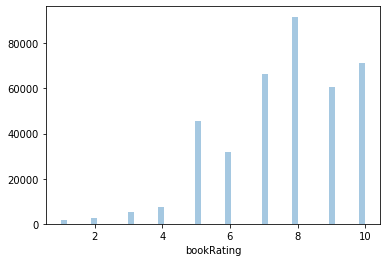

In [82]:
import matplotlib as plt
import seaborn as sns
sns.distplot(ratings['bookRating'],kde=False)

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [83]:
ratings=ratings.groupby('userID').filter(lambda x: x['userID'].count()>99)
ratings.shape

(103271, 3)

In [84]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

### Transform data to surprise format

In [85]:
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [88]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\Faisal/.surprise_data/ml-100k


### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [89]:
trainset.ur

defaultdict(list,
            {0: [(0, 4.0),
              (424, 3.0),
              (789, 4.0),
              (957, 3.0),
              (219, 3.0),
              (421, 3.0),
              (726, 3.0),
              (475, 4.0),
              (121, 3.0),
              (47, 4.0),
              (440, 5.0),
              (31, 4.0),
              (288, 3.0),
              (200, 4.0),
              (376, 4.0),
              (798, 3.0),
              (478, 2.0),
              (178, 1.0),
              (176, 3.0),
              (790, 4.0),
              (420, 3.0),
              (10, 5.0),
              (269, 5.0),
              (402, 4.0),
              (180, 3.0),
              (66, 5.0),
              (590, 3.0),
              (888, 3.0),
              (1067, 5.0),
              (509, 4.0),
              (85, 4.0),
              (913, 4.0),
              (270, 5.0),
              (240, 5.0),
              (956, 4.0),
              (59, 2.0),
              (227, 4.0),
              (386, 4.0)

### Explore trainset and testset

In [92]:
testset

[('265', '471', 4.0),
 ('500', '170', 5.0),
 ('538', '275', 4.0),
 ('472', '567', 4.0),
 ('373', '778', 5.0),
 ('151', '703', 4.0),
 ('807', '173', 3.0),
 ('747', '462', 5.0),
 ('881', '98', 5.0),
 ('275', '496', 3.0),
 ('171', '258', 4.0),
 ('405', '90', 4.0),
 ('1', '118', 3.0),
 ('313', '44', 3.0),
 ('313', '523', 5.0),
 ('472', '609', 5.0),
 ('747', '30', 5.0),
 ('798', '465', 4.0),
 ('65', '392', 5.0),
 ('13', '882', 3.0),
 ('804', '951', 3.0),
 ('95', '472', 5.0),
 ('870', '591', 2.0),
 ('92', '220', 1.0),
 ('943', '188', 4.0),
 ('698', '195', 4.0),
 ('819', '302', 5.0),
 ('268', '949', 2.0),
 ('503', '14', 3.0),
 ('486', '299', 1.0),
 ('92', '241', 3.0),
 ('655', '1379', 3.0),
 ('112', '751', 4.0),
 ('1', '259', 1.0),
 ('81', '275', 4.0),
 ('537', '274', 2.0),
 ('733', '324', 4.0),
 ('919', '471', 3.0),
 ('60', '842', 4.0),
 ('926', '292', 3.0),
 ('269', '8', 2.0),
 ('57', '409', 4.0),
 ('602', '243', 3.0),
 ('162', '474', 3.0),
 ('303', '100', 5.0),
 ('293', '1248', 2.0),
 ('42

### Import SVD from Surprise and for on trainset

In [93]:
from surprise import SVD
from surprise import accuracy

In [94]:
# we can now query for specific predicions
uid = str(196)  # raw user id
iid = str(302)  # raw item id

### Predict ratings for testset and check RMSE

In [98]:
from surprise import KNNWithMeans
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)
pred = algo.predict(uid, iid, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = None   est = 4.21   {'actual_k': 50, 'was_impossible': False}


In [100]:
test_pred = algo.test(testset)

In [102]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.9393


0.9393153147250587

In [104]:
algo = SVD()
algo.fit(trainset)

In [106]:
testset = trainset.build_anti_testset()

In [108]:
testset

[('423', '246', 3.5307529411764706),
 ('423', '161', 3.5307529411764706),
 ('423', '405', 3.5307529411764706),
 ('423', '317', 3.5307529411764706),
 ('423', '118', 3.5307529411764706),
 ('423', '606', 3.5307529411764706),
 ('423', '159', 3.5307529411764706),
 ('423', '652', 3.5307529411764706),
 ('423', '215', 3.5307529411764706),
 ('423', '418', 3.5307529411764706),
 ('423', '892', 3.5307529411764706),
 ('423', '212', 3.5307529411764706),
 ('423', '305', 3.5307529411764706),
 ('423', '416', 3.5307529411764706),
 ('423', '191', 3.5307529411764706),
 ('423', '515', 3.5307529411764706),
 ('423', '144', 3.5307529411764706),
 ('423', '174', 3.5307529411764706),
 ('423', '70', 3.5307529411764706),
 ('423', '582', 3.5307529411764706),
 ('423', '380', 3.5307529411764706),
 ('423', '410', 3.5307529411764706),
 ('423', '528', 3.5307529411764706),
 ('423', '445', 3.5307529411764706),
 ('423', '639', 3.5307529411764706),
 ('423', '968', 3.5307529411764706),
 ('423', '200', 3.5307529411764706),
 (

In [110]:
predictions = algo.test(testset)

In [113]:
# get RMSE
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.5902


0.5901534758747746

### Generating top n recommendations for a user

In [119]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n